# References
## McCurdy and Hamm 1994a
* Pair of MNs in the RC circuit: one is stimulated by injecting pulses of depolarizing current of 0.5 ms, ca. 7 Hz; Postsynaptic responses are recorded on the second impaled MN.
* Rostrocaudal distributions of recurrent inhibitory post-synaptic potentials amplitudes were obtained from pairs of motoneurons (Figure 3A). Amplitudes were determined from the difference between baseline level of activity in the resting membrane taken from the prestimulus period and the peak recurrent inhibitory post-synaptic potentials amplitude.
* The distance that separated the 180 pairs og motoneurons measured ranged form 86 $\mu$m to 4.7 mm.
* Different mean value of significant recurrent inhibitory post-synaptic potentials of motoneurons in all pairs depending on whether they are distant or not (based on Table 3).
* Amplitudes and durations for this sample are comparable with those found by Hamm et al. (1987a).

# Parameters adjusted
* Supposedly, the probability of connections and motoneuron conductances on Renshaw cells are the only parameters to be adjusted.

# Considerations
* SOL is used here because of an error. It should be MG on the pool creation and the appropriate value for the pool boundary (according to McCurdy and Hamm (1994a)).
* The stimulation rate used by McCurdy and Hamm (1994a) does not allow for the motoneuron-Renshaw cell synapse to recover from the post-synaptic depression described in Hultborn and Pierrot-Deseiligny (1979). Therefore, amplitudes reported are probably underestimated.
* The distances considered in the simulations included the whole range available whithin 0 to 4.7 mm. Furthermore, only 180 pairs were considered. These made the simulation simpler and faster.

In [1]:
import sys
sys.path.insert(0, '..')
# Allows plots to be zoomed in, etc
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import time
from scipy.interpolate import UnivariateSpline

from Configuration import Configuration
from MotorUnitPoolOpt import MotorUnitPool
from InterneuronPoolOpt import InterneuronPool
from NeuralTract import NeuralTract
# from SynapsesFactoryRenshaw import SynapsesFactory
from SynapsesFactory import SynapsesFactory

In [2]:
def simulator(numberS, numberFR, numberFF, numberRC, MNi, Parametrization):

    conf = Configuration('confuchiyama.rmto')

    # Number of cells
    idx = np.where(conf.confArray['f0']=='MUnumber_SOL-S')[0][0]
    conf.confArray['f1'][idx] = numberS
    idx = np.where(conf.confArray['f0']=='MUnumber_SOL-FR')[0][0]
    conf.confArray['f1'][idx] = numberFR
    idx = np.where(conf.confArray['f0']=='MUnumber_SOL-FF')[0][0]
    conf.confArray['f1'][idx] = numberFF
    idx = np.where(conf.confArray['f0']=='Number_RC_ext')[0][0]
    conf.confArray['f1'][idx] = numberRC
    
    # Duration of simulation
    conf.simDuration_ms = 40
    
    if Parametrization == 'old':
        # Parameters from java
        ## Connectivity
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:SOL-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:SOL-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:SOL-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100

        ## Conductances
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.3
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.24
        idx = np.where(conf.confArray['f0']=='gmax:SOL-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15
        idx = np.where(conf.confArray['f0']=='gmax:SOL-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.17
        idx = np.where(conf.confArray['f0']=='gmax:SOL-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.3

        ## Morphology
        idx = np.where(conf.confArray['f0']=='d@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 64.77885
        conf.confArray['f2'][idx] = 64.77885
        idx = np.where(conf.confArray['f0']=='l@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 285
        conf.confArray['f2'][idx] = 285
        idx = np.where(conf.confArray['f0']=='res@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 200
        conf.confArray['f2'][idx] = 200
        
    elif Parametrization == 'new':
        # Parameters from Python
        ## Threshold (makes a rheobase of 1.25-3.75 nA)
        idx = np.where(conf.confArray['f0']=='threshold:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 5
        conf.confArray['f2'][idx] = 15
        
        ## Connectivity
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 4
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 4
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 4
        idx = np.where(conf.confArray['f0']=='Con:SOL-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 6
        idx = np.where(conf.confArray['f0']=='Con:SOL-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 6
        idx = np.where(conf.confArray['f0']=='Con:SOL-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 6

        ## Conductances
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:SOL-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15
        idx = np.where(conf.confArray['f0']=='gmax:SOL-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15
        idx = np.where(conf.confArray['f0']=='gmax:SOL-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15

        ## Morphology
        idx = np.where(conf.confArray['f0']=='d@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 25
        conf.confArray['f2'][idx] = 25
        idx = np.where(conf.confArray['f0']=='l@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 242
        conf.confArray['f2'][idx] = 242
        idx = np.where(conf.confArray['f0']=='res@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 760
        conf.confArray['f2'][idx] = 760
        
    elif Parametrization == 'final':
        ## Conductances
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.13
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 45
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 140
        
        # Threshold
        idx = np.where(conf.confArray['f0']=='threshold:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 18.9089
        conf.confArray['f2'][idx] = 18.9089

        ## Morphology
        idx = np.where(conf.confArray['f0']=='d@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 27
        conf.confArray['f2'][idx] = 27
        idx = np.where(conf.confArray['f0']=='l@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 218.2168
        conf.confArray['f2'][idx] = 218.2168
        idx = np.where(conf.confArray['f0']=='res@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 7000
        conf.confArray['f2'][idx] = 7000

        # Ks
        idx = np.where(conf.confArray['f0']=='gmax_Kf:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 3300
        idx = np.where(conf.confArray['f0']=='gmax_Ks:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 2300000
        idx = np.where(conf.confArray['f0']=='beta_q:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 0.02
        idx = np.where(conf.confArray['f0']=='alpha_q:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 0.004
        idx = np.where(conf.confArray['f0']=='alpha_n:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 6
        idx = np.where(conf.confArray['f0']=='beta_n:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 0.5
        
        ## Connectivity, set to ensure neurons are connected properly
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:SOL-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:SOL-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:SOL-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
    
    pools = dict()
    pools[0] = MotorUnitPool(conf, 'SOL')
    pools[1] = InterneuronPool(conf, 'RC', 'ext')
    
    Syn = SynapsesFactory(conf, pools)

    t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)

    MN_mV = np.zeros((pools[0].MUnumber, len(t)))
    RC_mV = np.zeros((pools[1].Nnumber, len(t)))
    for i in xrange(0, len(t)):
        # stimulus to soma of MNi
        if t[i]>10 and t[i]<10.5:
            pools[0].iInjected[2*MNi+1] = 50
        else:
            pools[0].iInjected[2*MNi+1] = 0
        pools[0].atualizeMotorUnitPool(t[i]) # MN pool
        pools[2].atualizePool(t[i]) # RC synaptic Noise
        pools[1].atualizeInterneuronPool(t[i]) # RC pool
        for j in xrange(pools[0].MUnumber):
            MN_mV[j, i] = pools[0].v_mV[2*j+1]
        for j in xrange(pools[1].Nnumber):
            RC_mV[j, i] = pools[1].v_mV[j]

    pools[0].listSpikes()
    pools[1].listSpikes()
    
#     import pdb; pdb.set_trace()
    positions = []
    for i in range(pools[0].MUnumber):
        positions.append(pools[0].unit[i].position_mm)
    
    return MN_mV, RC_mV, t, positions

In [6]:
nS = 4
nFR = 4
nFF = 8
nRC = 16
nMN = nS+nFR+nFF
params = 'final'

boundary = 4.7
RIPSPs = []
distances = []
# Each iteration is a different MN being stimulated
for i in range(8, 9):
    MNsignal, RCsignal, t, positions = simulator(nS, nFR, nFF, nRC, i, params)
    peaks = [min(MNsignal[y,]) for y in range(MNsignal.shape[0])]
    # Calculate range of next loop according to positions and indexes
    for j in range(nMN):
        # Ignore the MN stimulated
        if j == i:
            continue
        distance = positions[j] - positions[i]
        # Ignore recordings out of the boundary
        if abs(distance)>boundary:
            continue
        distances.append(distance)
        RIPSPs.append(peaks[j])

Muscle spindle from muscle SOL built.
Motor Unit Pool SOL built
Interneuron Pool of RC ext built
All the 512 synapses were built
Synaptic Noise on RC_ext built
All the 16 synaptic noises were built


<IPython.core.display.Javascript object>


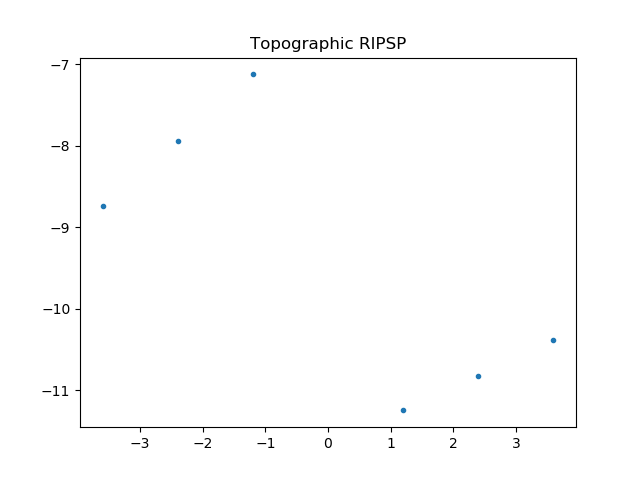

In [7]:
plt.figure()
plt.plot(distances, RIPSPs, '.')
plt.title('Topographic RIPSP')
plt.show()

<IPython.core.display.Javascript object>


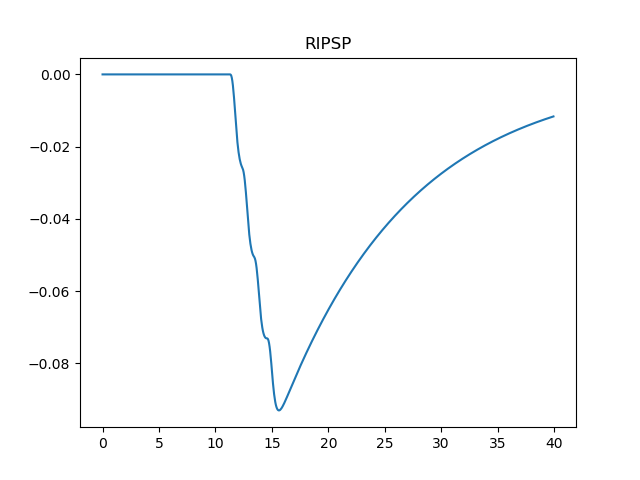

0.0


<IPython.core.display.Javascript object>


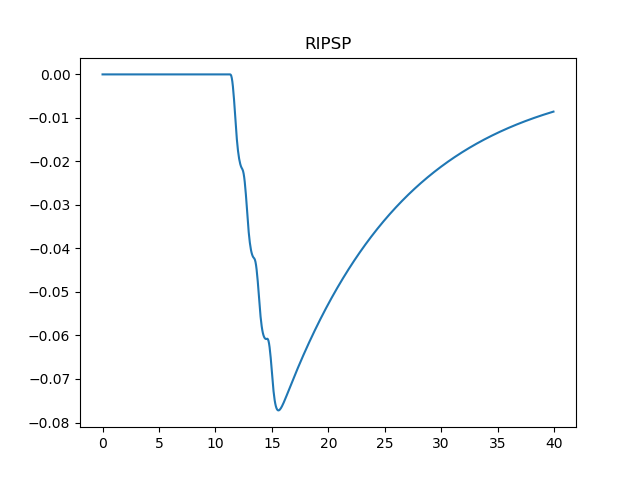

1.2


<IPython.core.display.Javascript object>


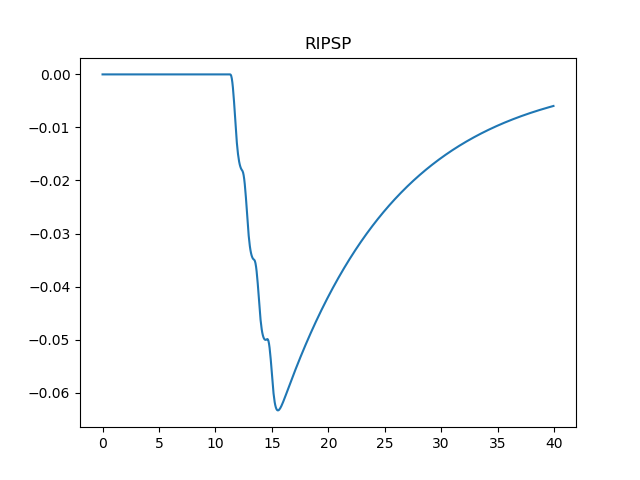

2.4


<IPython.core.display.Javascript object>


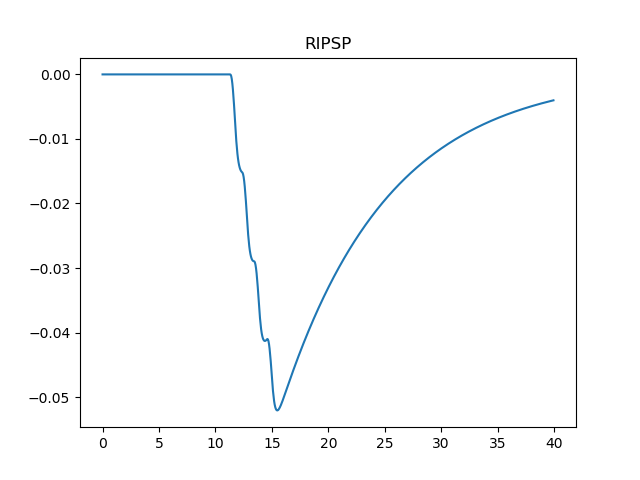

3.5999999999999996


<IPython.core.display.Javascript object>


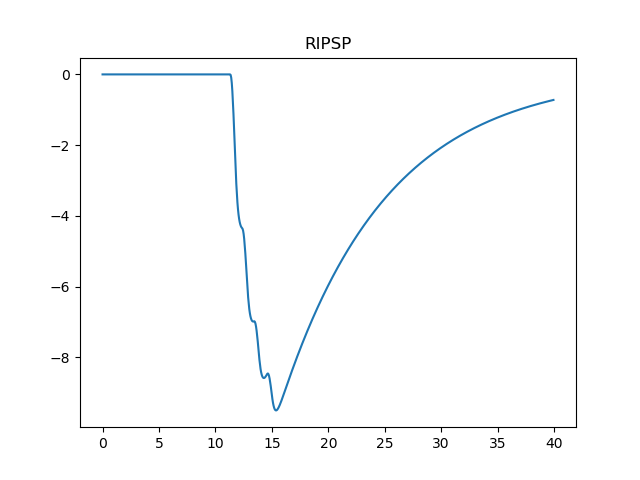

4.8


<IPython.core.display.Javascript object>


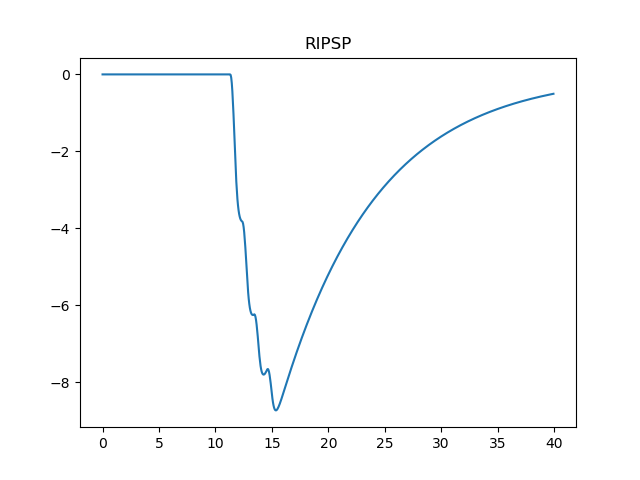

6.0


<IPython.core.display.Javascript object>


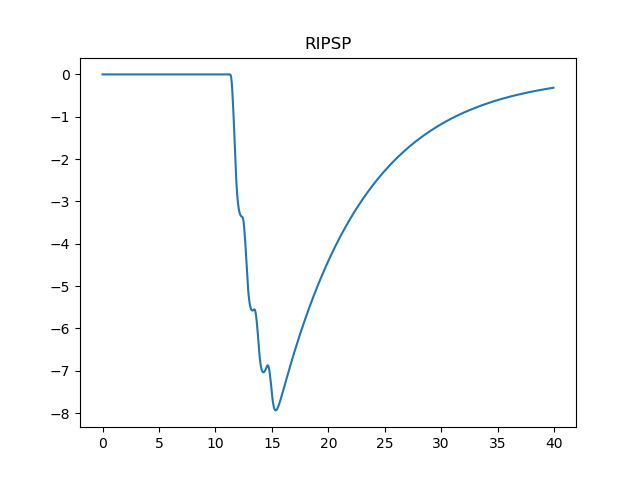

7.199999999999999


<IPython.core.display.Javascript object>


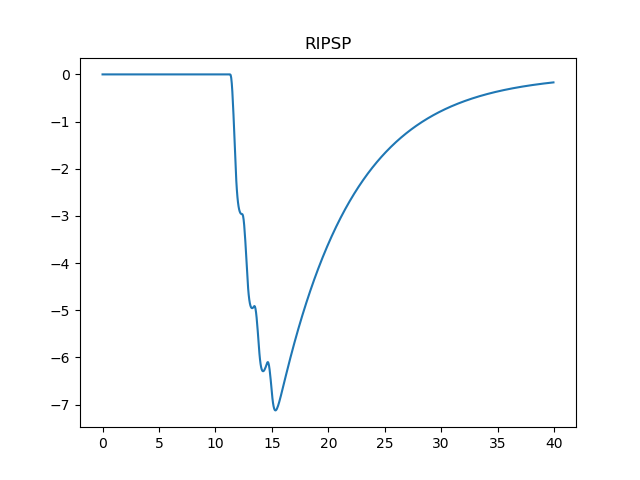

8.4


<IPython.core.display.Javascript object>


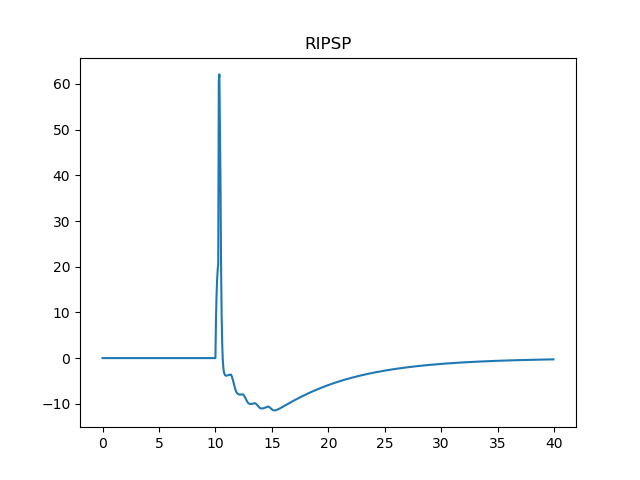

9.6


<IPython.core.display.Javascript object>


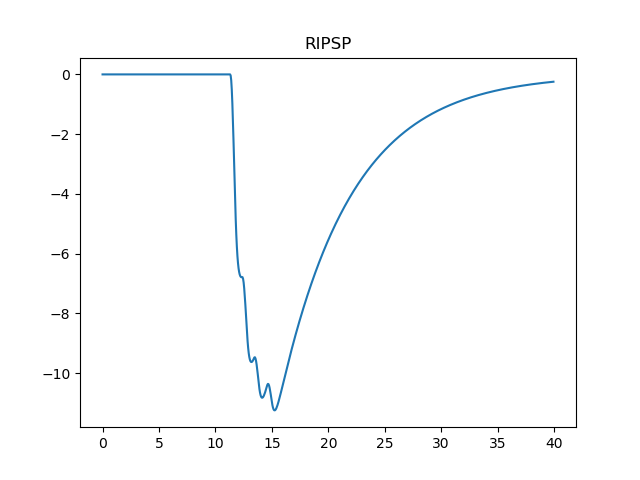

10.799999999999999


<IPython.core.display.Javascript object>


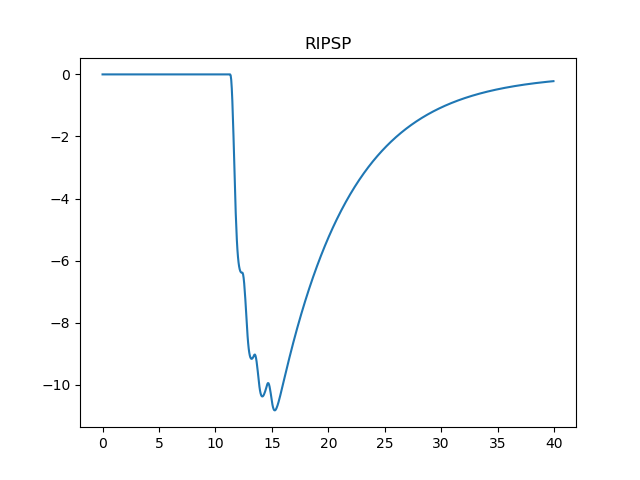

12.0


<IPython.core.display.Javascript object>


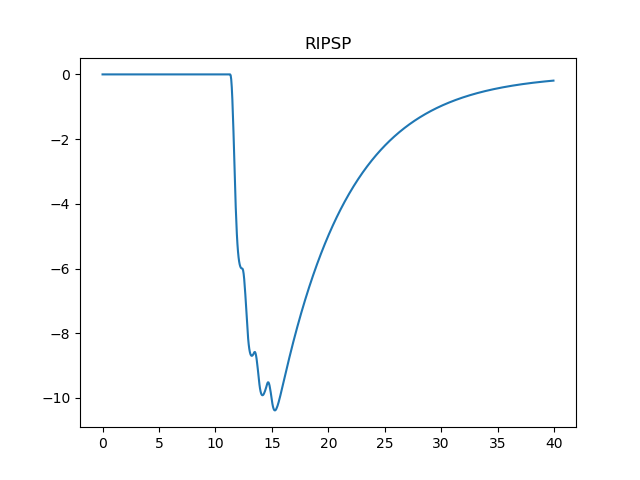

13.2


<IPython.core.display.Javascript object>


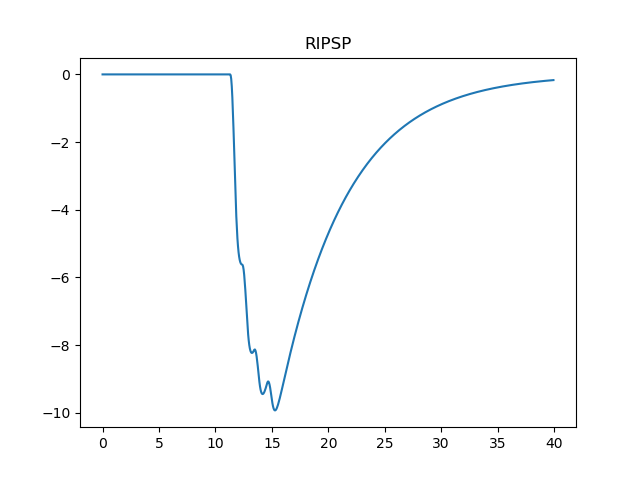

14.399999999999999


<IPython.core.display.Javascript object>


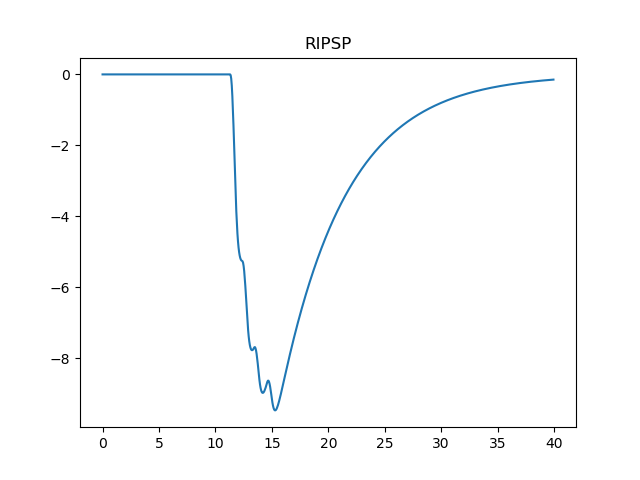

15.6


<IPython.core.display.Javascript object>


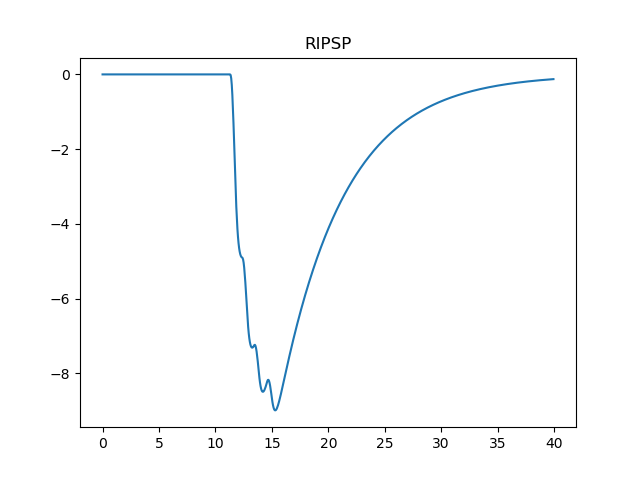

16.8


<IPython.core.display.Javascript object>


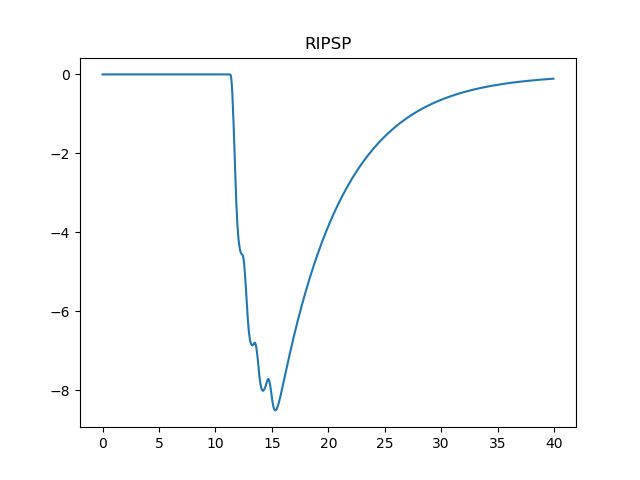

18.0


In [8]:
for i in xrange(nMN):
        plt.figure()
        print positions[i]
        plt.plot(t, MNsignal[i,])
        plt.title('RIPSP')
        plt.show()

In [26]:
nS = 75
nFR = 75
nFF = 150
nRC = 300
nMN = nS+nFR+nFF
MNidx = range(nMN)
params = 'final'

boundary = 4.7
RIPSPs = []
distances = []
# Each iteration is a different MN being stimulated
stimulated_MNs = np.random.choice(MNidx, 14, replace=False)

tic = time.clock()

for i in stimulated_MNs:
    MNsignal, RCsignal, t, positions = simulator(nS, nFR, nFF, nRC, i, params)
    peaks = [min(MNsignal[y,]) for y in range(MNsignal.shape[0])]
    
    # 180 pairs
    available_MNs = [x for x in MNidx if x != i]
    recorded_MNs = np.random.choice(available_MNs, 13, replace=False)
    for j in recorded_MNs:
        # Ignore the MN stimulated
        if j == i:
            continue
        distance = positions[j] - positions[i]
        # Ignore recordings out of the boundary
        if abs(distance)>boundary:
            continue
        distances.append(distance)
        RIPSPs.append(peaks[j])
        
toc = time.clock()
print str(toc - tic) + ' seconds'

Muscle spindle from muscle SOL built.
Motor Unit Pool SOL built
Interneuron Pool of RC ext built
All the 180000 synapses were built
Synaptic Noise on RC_ext built
All the 300 synaptic noises were built
Muscle spindle from muscle SOL built.
Motor Unit Pool SOL built
Interneuron Pool of RC ext built
All the 180000 synapses were built
Synaptic Noise on RC_ext built
All the 300 synaptic noises were built
Muscle spindle from muscle SOL built.
Motor Unit Pool SOL built
Interneuron Pool of RC ext built
All the 180000 synapses were built
Synaptic Noise on RC_ext built
All the 300 synaptic noises were built
Muscle spindle from muscle SOL built.
Motor Unit Pool SOL built
Interneuron Pool of RC ext built
All the 180000 synapses were built
Synaptic Noise on RC_ext built
All the 300 synaptic noises were built
Muscle spindle from muscle SOL built.
Motor Unit Pool SOL built
Interneuron Pool of RC ext built
All the 180000 synapses were built
Synaptic Noise on RC_ext built
All the 300 synaptic noises w

<IPython.core.display.Javascript object>


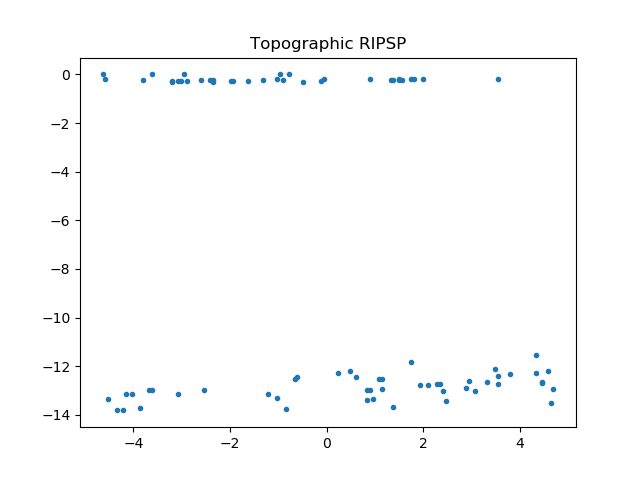

In [27]:
plt.figure()
plt.plot(distances, RIPSPs, '.')
plt.title('Topographic RIPSP')
plt.show()

In [36]:
cutoff_value = 1.4

closeidx = [x for x in range(len(distances)) if abs(distances[x])<=cutoff_value]
close_pairs = [RIPSPs[x] for x in closeidx]
distantidx = [x for x in range(len(distances)) if abs(distances[x])>cutoff_value]
distant_pairs = [RIPSPs[x] for x in distantidx]

In [37]:
RIPSP_close = np.mean(close_pairs)
RIPSP_distant = np.mean(distant_pairs)

print RIPSP_close
print RIPSP_distant

-7.721407136274316
-7.428891190304228
